# Preprocessing Seurat v4 CITE-seq dataset.
See https://satijalab.org/seurat/v4.0/reference_mapping.html and
https://www.biorxiv.org/content/10.1101/2020.10.12.335331v1.

In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns

sc.settings.verbosity = 2

sc.logging.print_versions()

scanpy==1.4.6 anndata==0.7.3 umap==0.4.6 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.6.1


# Download data

Download from google drive provided by the authors (https://drive.google.com/drive/folders/1D6D3-sreFy_4A1EdNGhIoPilMGIPckBD).

In [12]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Ve9xmZy9zdIKbKZp21hWzEb_SX-d1Rj8' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Ve9xmZy9zdIKbKZp21hWzEb_SX-d1Rj8" -O '../data/seurat-2020/adt/pbmc_multimodal_ADT.h5ad' && rm -rf /tmp/cookies.txt

--2020-12-28 11:38:24--  https://docs.google.com/uc?export=download&confirm=w3sh&id=1Ve9xmZy9zdIKbKZp21hWzEb_SX-d1Rj8
Resolving docs.google.com (docs.google.com)... 216.58.207.174
Connecting to docs.google.com (docs.google.com)|216.58.207.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-5s-docs.googleusercontent.com/docs/securesc/lj0buqlua2iem3jbo0rhssqm3f5iju9g/vupg0vilrqeiei85bse9fd5ne8labpvu/1609151850000/07311667091604685757/06790115790401138059Z/1Ve9xmZy9zdIKbKZp21hWzEb_SX-d1Rj8?e=download [following]
--2020-12-28 11:38:24--  https://doc-10-5s-docs.googleusercontent.com/docs/securesc/lj0buqlua2iem3jbo0rhssqm3f5iju9g/vupg0vilrqeiei85bse9fd5ne8labpvu/1609151850000/07311667091604685757/06790115790401138059Z/1Ve9xmZy9zdIKbKZp21hWzEb_SX-d1Rj8?e=download
Resolving doc-10-5s-docs.googleusercontent.com (doc-10-5s-docs.googleusercontent.com)... 142.250.74.193
Connecting to doc-10-5s-docs.googleusercontent.com (doc-10-5s-docs.goog

In [13]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RUVBgKJ-rbQCS46lnX8rpT9uPB-nLRlK' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1RUVBgKJ-rbQCS46lnX8rpT9uPB-nLRlK" -O '../data/seurat-2020/rna/pbmc_multimodal_RNA.h5ad' && rm -rf /tmp/cookies.txt

--2020-12-28 11:50:42--  https://docs.google.com/uc?export=download&confirm=jqaN&id=1RUVBgKJ-rbQCS46lnX8rpT9uPB-nLRlK
Resolving docs.google.com (docs.google.com)... 216.58.207.174
Connecting to docs.google.com (docs.google.com)|216.58.207.174|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-b8-docs.googleusercontent.com/docs/securesc/i42un89qk6bti7ln49p7rhq2oujgf3kg/2bv0elv8krj631o46so3u479r1er3kf4/1609152600000/07311667091604685757/12579243821926068699Z/1RUVBgKJ-rbQCS46lnX8rpT9uPB-nLRlK?e=download [following]
--2020-12-28 11:50:42--  https://doc-04-b8-docs.googleusercontent.com/docs/securesc/i42un89qk6bti7ln49p7rhq2oujgf3kg/2bv0elv8krj631o46so3u479r1er3kf4/1609152600000/07311667091604685757/12579243821926068699Z/1RUVBgKJ-rbQCS46lnX8rpT9uPB-nLRlK?e=download
Resolving doc-04-b8-docs.googleusercontent.com (doc-04-b8-docs.googleusercontent.com)... 142.250.74.193
Connecting to doc-04-b8-docs.googleusercontent.com (doc-04-b8-docs.goog

# Preproces scRNA-seq

Provided data are already QCed so we skip the QC step.

In [14]:
RNA_DIR = '../data/seurat-2020/rna/'
ADT_DIR = '../data/seurat-2020/adt/'

In [34]:
scrna = sc.read(RNA_DIR + 'pbmc_multimodal_RNA.h5ad')
scrna

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,


AnnData object with n_obs × n_vars = 161764 × 20729
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'PCs', 'SPCA'
    obsp: 'distances'

In [35]:
scrna.var_names_make_unique()

In [36]:
scrna.obs['cell_type'] = scrna.obs['celltype.l1']
del scrna.obs['celltype.l1']

In [38]:
scrna.layers['count'] = scrna.raw.X

## Vizualize using provided UMAP

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


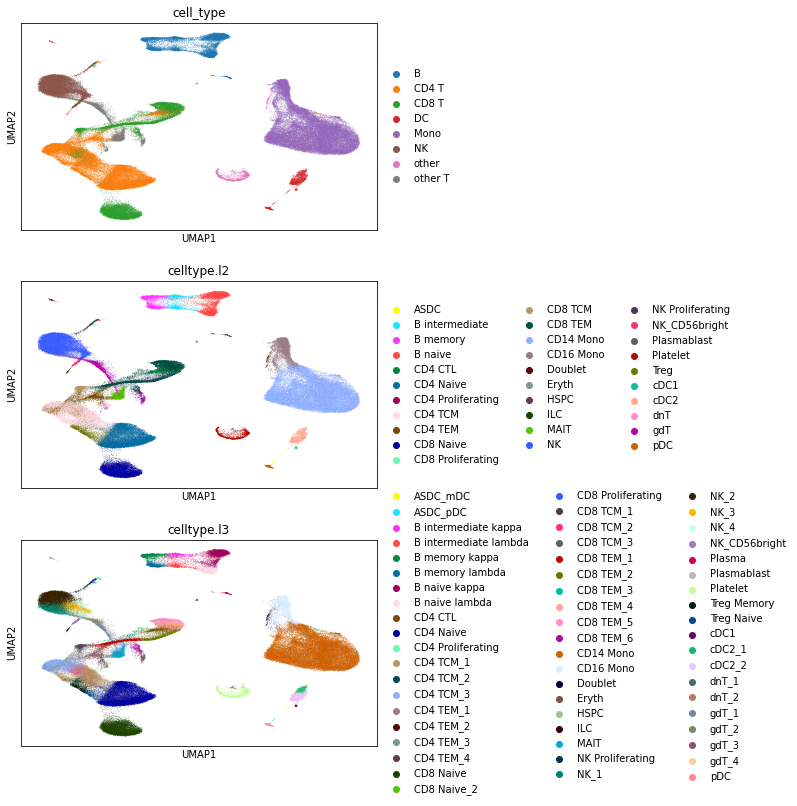

In [56]:
sc.pl.umap(scrna, color = ['cell_type', 'celltype.l2', 'celltype.l3'], ncols=1)

## Highly variable genes

extracting highly variable genes
    finished (0:01:01)


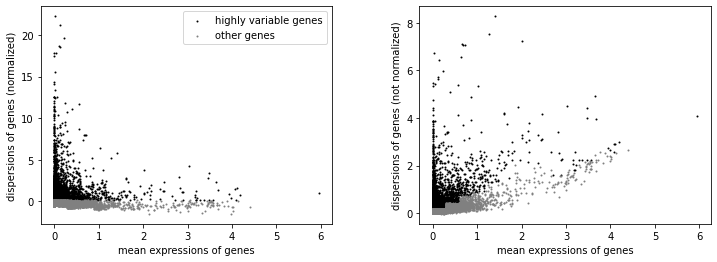

number of highly variable genes = 4000


In [43]:
sc.pp.highly_variable_genes(scrna, n_top_genes=4000)
sc.pl.highly_variable_genes(scrna)
print('number of highly variable genes =', scrna.var.highly_variable.sum())

In [44]:
scrna_hvg = scrna[:, scrna.var.highly_variable]
scrna_hvg

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 161764 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l2', 'celltype.l3', 'Phase', 'cell_type'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'cell_type_colors', 'celltype.l2_colors', 'celltype.l3_colors'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'PCs', 'SPCA'
    layers: 'count'
    obsp: 'distances'

In [45]:
scrna_hvg.layers['count'] = scrna_hvg.raw[:, scrna.var.highly_variable].X

In [46]:
scrna_hvg

AnnData object with n_obs × n_vars = 161764 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l2', 'celltype.l3', 'Phase', 'cell_type'
    var: 'features', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'cell_type_colors', 'celltype.l2_colors', 'celltype.l3_colors'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'PCs', 'SPCA'
    layers: 'count'
    obsp: 'distances'

In [47]:
del scrna_hvg.raw
del scrna.raw

# Preproces CITE-seq

In [48]:
cite = sc.read(ADT_DIR + 'pbmc_multimodal_ADT.h5ad')

In [49]:
cite

AnnData object with n_obs × n_vars = 161764 × 224
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase'
    var: 'features'
    obsm: 'X_apca', 'X_aumap', 'X_pca', 'X_spca', 'X_umap', 'X_wnn.umap'
    varm: 'APCA'

In [50]:
cite.var_names_make_unique()

In [51]:
cite.layers['count'] = cite.raw.X

In [52]:
del cite.raw

In [53]:
cite.obs['cell_type'] = cite.obs['celltype.l1']
del cite.obs['celltype.l1']

## Vizualize using provided UMAP

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


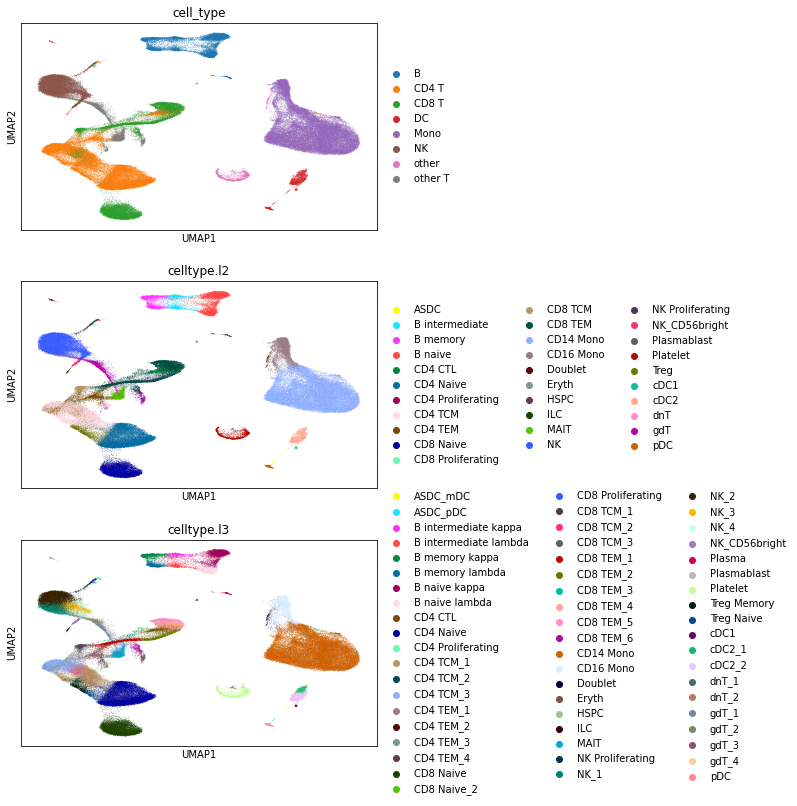

In [57]:
sc.pl.umap(cite, color = ['cell_type', 'celltype.l2', 'celltype.l3'], ncols=1)

# Save the results

## All genes

In [58]:
com_index = scrna.obs.index.intersection(cite.obs.index)
scrna_all = scrna[com_index]
cite_all = cite[com_index]
print(scrna_all.shape, cite_all.shape)

(161764, 20729) (161764, 224)


/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [59]:
scrna_all.write(RNA_DIR + 'expressions.h5ad')
cite_all.write(ADT_DIR + 'protein.h5ad')

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


## Only hvg

In [61]:
com_index = set(scrna_hvg.obs.index) & set(cite.obs.index)
scrna_hvg = scrna_hvg[scrna_hvg.obs.index.isin(com_index)]
cite = cite[cite.obs.index.isin(com_index)]
print(scrna_hvg.shape, cite.shape)

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


(161764, 4000) (161764, 224)


In [62]:
scrna_hvg.write(RNA_DIR + 'expressions_hvg.h5ad')

/Users/alitinet/opt/miniconda3/envs/scmulti/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
